# Question 3: Lorenz System

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation

Equations of the Lorenz System 
$$\frac{dx}{dt} = \sigma (y-x)$$
$$\frac{dy}{dt} = x(\rho - z)$$
$$\frac{dz}{dt} = xy - \beta z$$

**Part a) Real Systems**

The Lorenz system can describe thermal convection in a fluid layer heated from below. Convection can be seen in the atmosphere, Earth's mantle, or a pot of hot water as examples. In this context, <br>

x = The rate of convective motion (related to the velocity field of the fluid). <br>
y = The temperature difference between upward and downward moving fluid parcels. <br>
z = The deviation of the vertical temperature profile from the linear conductive profile.

σ (Prandtl number) = Represents the ratio of momentum diffusivity (viscosity) to thermal diffusivity. It determines how quickly heat diffuses relative to momentum. <br>
ρ (Rayleigh number) = Represents the temperature difference between the top and bottom layers of the fluid. It quantifies the strength of buoyancy-driven convection; when it is large enough, convection sets in. <br>
β = A geometric factor related to the aspect ratio of the convective rolls.

**Part b) Lorenz Attractors**

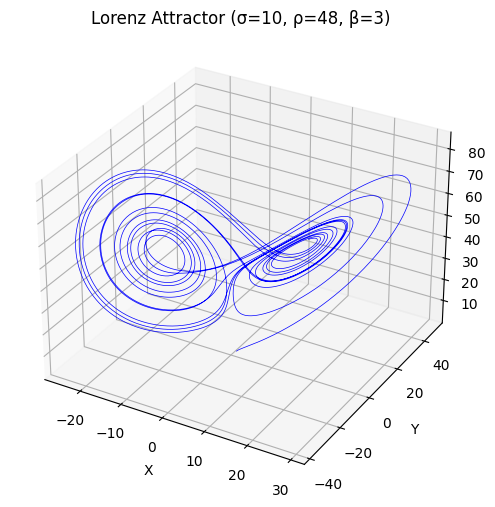

In [5]:
def lorenz(t, state, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Parameters
sigma = 10
rho = 48
beta = 3

# Initial conditions
initial_state = [1.0, 1.0, 1.0]

# Time range
t_span = (0, 12)
t_eval = np.linspace(0, 12, 5000)  # Fine resolution for smooth curve

# Solve the Lorenz system
solution = solve_ivp(lorenz, t_span, initial_state, args=(sigma, rho, beta), t_eval=t_eval)

# Extract coordinates
xa, ya, za = solution.y

# Plot the Lorenz attractor
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(xa, ya, za, lw=0.5, color='b')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Lorenz Attractor (σ=10, ρ=48, β=3)")
plt.savefig("lorenz_attractor.png")
plt.show()

**Part c) Trajectories**

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '800x600', '-pix_fmt', 'rgba', '-r', '30', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'lorenz_attractor.mp4']' returned non-zero exit status 255.

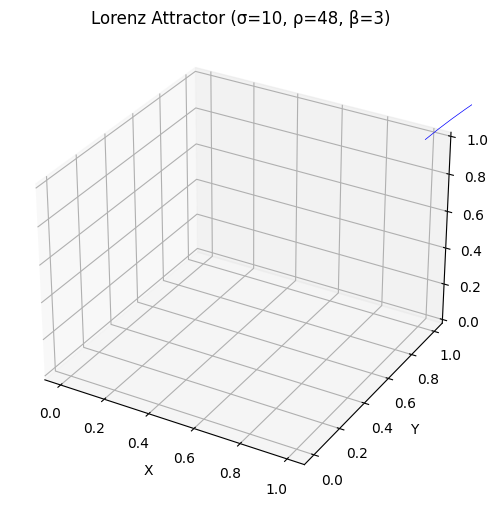

In [7]:
# Initial conditions
initial_state = [1.0, 1.0, 1.0]

# Time range
t_span = (0, 12)
t_eval = np.linspace(0, 12, 5000)

# Solve the Lorenz system
solution = solve_ivp(lorenz, t_span, initial_state, args=(sigma, rho, beta), t_eval=t_eval)
xa, ya, za = solution.y

# Create figure and axis
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Lorenz Attractor (σ=10, ρ=48, β=3)")

# Animation function
def update(num, xa, ya, za, line):
    line.set_data(xa[:num], ya[:num])
    line.set_3d_properties(za[:num])
    return line,

line, = ax.plot([], [], [], lw=0.5, color='b')
ani = animation.FuncAnimation(fig, update, frames=len(xa), fargs=(xa, ya, za, line), interval=1, blit=True)

# Save video
ani.save('lorenz_attractor.mp4', writer='ffmpeg', fps=30)

plt.show()